In [184]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
os.getcwd()

'/Users/ryanfisher/Documents/Springboard/Springboard/ultimate_challenge'

In [5]:
os.listdir()

['ultimate_data_science_challenge.pdf',
 'logins.json',
 'Untitled.ipynb',
 'ultimate_data_challenge.json',
 '.ipynb_checkpoints']

## Part 1

In [116]:
df = pd.read_json(r'/Users/ryanfisher/Documents/Springboard/Springboard/ultimate_challenge/logins.json')

In [117]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [118]:
df['count'] = 1
df = df.set_index('login_time')

In [119]:
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [120]:
df_count = df.groupby(pd.Grouper(freq='15Min')).aggregate(np.sum) 
df_count['count'] = df_count['count'].fillna(0)
df_count.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


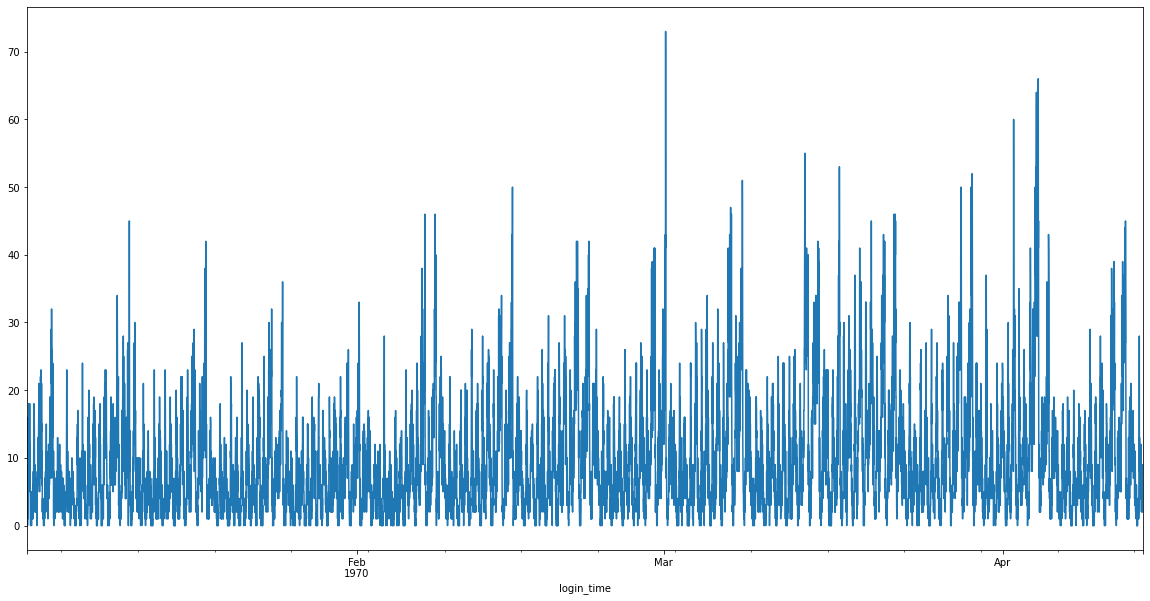

In [121]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

df_count['count'].plot()

#plt.show()

In [124]:
df_count['datetime'] = pd.to_datetime(df_count.index)

In [130]:
import calendar
days = list(calendar.day_abbr)
months = list(calendar.month_abbr)

In [131]:
df_count['day'] = df_count['datetime'].apply(lambda x: days[x.weekday()])

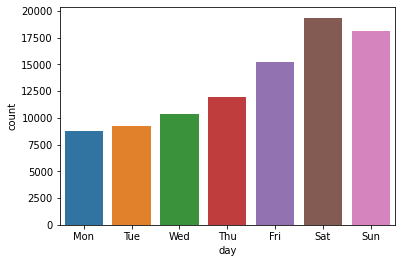

In [132]:
day_count = df_count.groupby('day')['count'].sum()
sns.barplot(x=day_count.index, y=day_count, order=days)

In [135]:
df_count['month'] = df_count['datetime'].apply(lambda x: months[x.month])

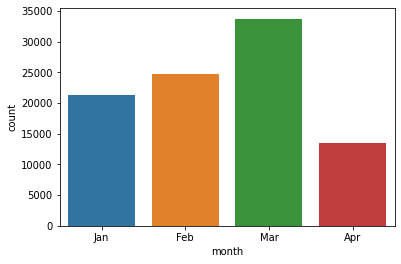

In [146]:
month_counts = df_count.groupby('month')['count'].sum()
sns.barplot(x=month_counts.index, y=month_counts, order=['Jan', 'Feb', 'Mar', 'Apr'])

## Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
### Success Metrics
The success metric I would use is to look at the ratio of drivers in each city for the full day. If the ratio is close to 1:1, that means that drivers spent time in both cities, Metropolis during the day and Gotham at night.

### Experiment
1. To implement this experiment we will track drivers before the reimbursement of the tolls, and then again after implementing the new toll reimbursement. We will label drivers based on what city they have more drop offs in.
2. I will perform hypothesis testing comparing the two groups of drivers that were categorized above by before and after the implementation of the experiment. 
3. We will look at different statistical scores (p-score) to evaluate the performance.

## Part 3

In [208]:
json_data = open(r'/Users/ryanfisher/Documents/Springboard/Springboard/ultimate_challenge/ultimate_data_challenge.json').readline()

In [209]:
json_data = json.loads(json_data)

In [210]:
df2 = pd.DataFrame(json_data)

In [211]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [212]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [213]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Replacing null values in the phone column with "unknown."

In [214]:
df2['phone'] = df2['phone'].fillna('Unknown')

In [215]:
df2['avg_rating_by_driver'].describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [216]:
df2['avg_rating_of_driver'].describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

Filling average ratings columns with mean values for each.

In [ ]:
df2['avg_rating_by_driver'] = df2['avg_rating_by_driver'].fillna(df2['avg_rating_by_driver'].mean())
df2['avg_rating_of_driver'] = df2['avg_rating_of_driver'].fillna(df2['avg_rating_of_driver'].mean())

In [218]:
df2['last_trip_date'].sort_values(ascending=False)

45357    2014-07-01
22735    2014-07-01
14473    2014-07-01
38651    2014-07-01
45126    2014-07-01
            ...    
37295    2014-01-01
34828    2014-01-01
40336    2014-01-01
10729    2014-01-01
31425    2014-01-01
Name: last_trip_date, Length: 50000, dtype: object

In [219]:
df2['last_trip_date'] = df2['last_trip_date'].apply(lambda x: pd.Timestamp(x, tz=None))
df2['retained'] = df2['last_trip_date'].apply(lambda x: 1 if x >= pd.Timestamp('2014-06-01', tz=None) else 0)

In [220]:
df2

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


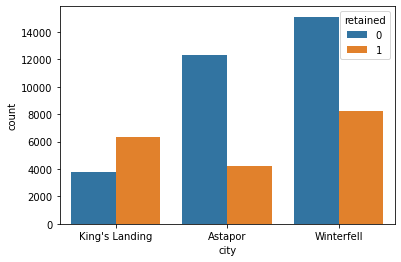

In [221]:
sns.countplot(x='city',data=df2,hue='retained')

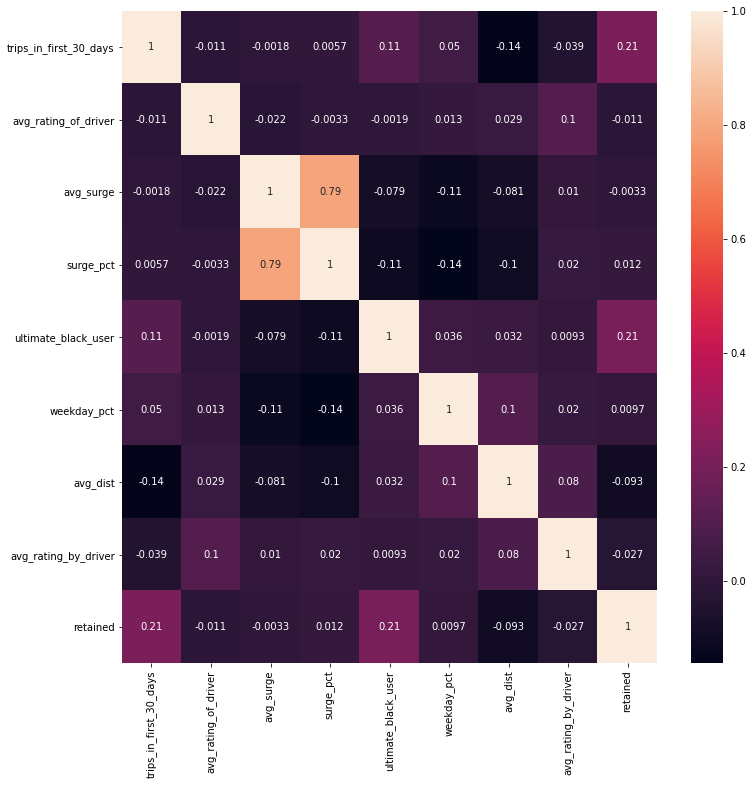

In [223]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(), annot=True)

In [224]:
df2 = pd.get_dummies(df2, prefix='dummy_')

In [225]:
X, y = df2.drop(['retained'],axis=1), df2['retained']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [227]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression()
model = RandomForestRegressor(max_depth=10, random_state=0)
model.fit(X, y)
model.score(X, y)

0.9261592571158248

Using Random Forest Regressor, we have **93%** accuracy.

# Recommendations

* Since the least amount of users are retained in Kings Landing, that is where we should focus our efforts.
* The biggest correlation according to the heatmap above is the Ultimate Black User. So we should try and figure out ways to get more users to become Ultimate Black Users. 
* The other big correlation was users who had trips within the first 30 days. We should increase incentives to users within the first 30 days.